In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [98]:
btc_1h = pd.read_csv ('./btc_1h.csv', encoding='unicode_escape')

In [99]:
btc_1h['time'] = btc_1h['time'].str.extract('(\d{4}-\d{2}-\d{2}\w\d{2}:\d{2}:\d{2})', expand=True)
btc_1h['time'] = pd.to_datetime(btc_1h["time"])
btc_1h.set_index("time", inplace = True)
#btc_5 = btc_5.reindex(pd.date_range(start=btc_5.index.min(), end=btc_5.index.max(), freq='5m'))

In [100]:
btc_1h.head()

,close,Volume,K,RSI,Volume delta for the bar,Up volume for the bar,Dn volume for the bar,Total volume
time,,,,,,,,
2022-09-18 06:00:00,20004.5,1838.421,11.239499,53.522461,-63.941,887.240,-951.181,1838.421
2022-09-18 07:00:00,20057.0,1809.740,15.019838,56.989801,807.152,1308.446,-501.294,1809.740
2022-09-18 08:00:00,20027.0,2021.783,20.987174,54.488286,37.599,1029.691,-992.092,2021.783
2022-09-18 09:00:00,20040.5,1518.998,28.407397,55.436235,243.374,881.186,-637.812,1518.998
2022-09-18 10:00:00,20041.0,1830.063,28.372976,55.473227,393.939,1112.001,-718.062,1830.063


In [101]:
btc_1h.describe()

,close,Volume,K,RSI,Volume delta for the bar,Up volume for the bar,Dn volume for the bar,Total volume
count,1666.000000,1666.000000,1.666000e+03,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000
mean,18900.491597,7621.169681,4.883906e+01,48.924048,-42.015364,3789.577158,-3831.592523,7621.169681
std,1456.199166,10075.191735,3.085194e+01,11.511312,3161.544079,5079.088915,5473.141742,10075.191735
min,15632.500000,482.389000,-1.890000e-14,14.465233,-37589.358000,215.344000,-90366.095000,482.389000
25%,18232.000000,2721.254500,2.107207e+01,41.709107,-704.986000,1272.964250,-4372.003750,2721.254500
50%,19196.500000,4661.185000,4.813684e+01,48.453669,-1.048500,2307.535000,-2261.282000,4661.185000
75%,19912.500000,8876.858000,7.731592e+01,55.909153,663.119750,4318.806500,-1303.247000,8876.858000
max,21427.500000,150351.074000,1.000000e+02,90.607713,36116.477000,74729.320000,-223.557000,150351.074000


In [102]:
#and btc_1h ["Volume delta for the bar"][i] < 0
#and btc_1h ["Volume delta for the bar"][i] > 0

In [114]:
def buySell(btc_1h):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(len(btc_1h)):
    if (btc_1h ['RSI'][i] < 17 and btc_1h["Volume"][i] > btc_1h["Volume"].mean()):
      if flag != 1:
        sigPriceBuy.append(btc_1h['close'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif (btc_1h['RSI'][i] > 63 and btc_1h["Volume"][i] > btc_1h["Volume"].mean()):
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(btc_1h['close'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
  return(sigPriceBuy, sigPriceSell)

In [115]:
buySell = buySell(btc_1h)
btc_1h['Buy Signal Price'] = buySell[0]
btc_1h['Sell Signal Price'] = buySell[1]
# To show the data
btc_1h.head()

,close,Volume,K,RSI,Volume delta for the bar,Up volume for the bar,Dn volume for the bar,Total volume,Buy Signal Price RSI,Sell Signal Price RSI,Buy Signal Price,Sell Signal Price
time,,,,,,,,,,,,
2022-09-18 06:00:00,20004.5,1838.421,11.239499,53.522461,-63.941,887.240,-951.181,1838.421,NaN,NaN,NaN,NaN
2022-09-18 07:00:00,20057.0,1809.740,15.019838,56.989801,807.152,1308.446,-501.294,1809.740,NaN,NaN,NaN,NaN
2022-09-18 08:00:00,20027.0,2021.783,20.987174,54.488286,37.599,1029.691,-992.092,2021.783,NaN,NaN,NaN,NaN
2022-09-18 09:00:00,20040.5,1518.998,28.407397,55.436235,243.374,881.186,-637.812,1518.998,NaN,NaN,NaN,NaN
2022-09-18 10:00:00,20041.0,1830.063,28.372976,55.473227,393.939,1112.001,-718.062,1830.063,NaN,NaN,NaN,NaN


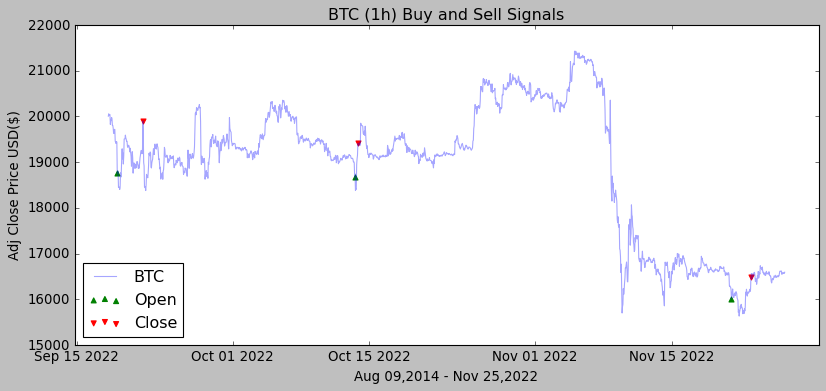

In [116]:
plt.style.use('classic')
plt.figure(figsize=(12,5))
plt.plot(btc_1h['close'], label='BTC', alpha=0.35)
plt.plot(btc_1h['Buy Signal Price'], label='', alpha=0.35)
plt.plot(btc_1h['Sell Signal Price'],label='', alpha=0.35)
plt.scatter(btc_1h.index, btc_1h['Buy Signal Price'], label ='Open', marker='^',color='green')
plt.scatter(btc_1h.index, btc_1h['Sell Signal Price'],label='Close', marker='v', color='red')
plt.title('BTC (1h) Buy and Sell Signals')
plt.xlabel("Aug 09,2014 - Nov 25,2022")
plt.ylabel("Adj Close Price USD($)")
plt.legend(loc='lower left')
plt.show()